In [ ]:
from google.colab import files
uploaded = files.upload()

Saving headbrain.csv to headbrain.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['headbrain.csv']))
print(df)

     Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         1          1             4512                 1530
1         1          1             3738                 1297
2         1          1             4261                 1335
3         1          1             3777                 1282
4         1          1             4177                 1590
..      ...        ...              ...                  ...
232       2          2             3214                 1110
233       2          2             3394                 1215
234       2          2             3233                 1104
235       2          2             3352                 1170
236       2          2             3391                 1120

[237 rows x 4 columns]


In [ ]:

import numpy as np
X1 = np.array([i for i in range(11)])
Y1 = np.array([2*i for i in range(11)])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
X = normalized_data[:, 2]# normalisze the data in range of (0,1) and : all rows and 2 column
Y = normalized_data[:, 3]

In [ ]:
class LinearRegression:
   def __init__(self, X, Y):
     self.X = X
     self.Y = Y
     self.b = [0, 0]

   def predict(self):
     Y_pred = np.array([])

     for x in self.X:
        Y_pred = np.append(Y_pred, self.b[0] + (self.b[1] * x))
     return Y_pred

   def update_coeffs(self, learning_rate):
      Y_pred = self.predict()
      m = len(self.Y)
      self.b[0] = self.b[0] - ( learning_rate * ( (1/m) * np.sum(Y_pred - Y) ) )
      self.b[1] = self.b[1] - ( learning_rate * ( (1/m) * np.sum((Y_pred - Y) * self.X) ) )

   def compute_cost(self, Y_pred):
     m = len(self.Y)
     J = ( 1 / 2*m ) * ( np.sum(Y_pred - self.Y)**2 )
     return J

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def main(X, Y):
    regressor = LinearRegression(X, Y)#object
    iterations = 0
    steps = 100
    learning_rate = 0.01
    costs = []


    # epoch-1
    Y_pred = regressor.predict()
    f = plt.figure('Initial Best Fit Line')
    plt.scatter(regressor.X, regressor.Y, color='b')
    plt.plot(regressor.X, Y_pred, color='g')
    f.show()

    # Subsequent epochs
    while 1:
      Y_pred = regressor.predict()
      cost = regressor.compute_cost(Y_pred)
      costs.append(cost)
      regressor.update_coeffs(learning_rate)

      iterations += 1
      if iterations % steps == 0:
         print(iterations, "epochs elapsed")
         print("Current cost is :", regressor.compute_cost(Y_pred))

         stop = input("Do you want to stop (y/n)??")
         if stop == "y":
            break

    # final best-fit line
    f = plt.figure('Final Best Fit Line')
    plt.scatter(regressor.X, regressor.Y, color='b')
    plt.plot(regressor.X, Y_pred, color='g')
    f.show()

    f = plt.figure('Verification')
    plt.plot(range(iterations), costs, color='b')
    f.show()

100 epochs elapsed
Current cost is : 129787.04484597195
Do you want to stop (y/n)??y


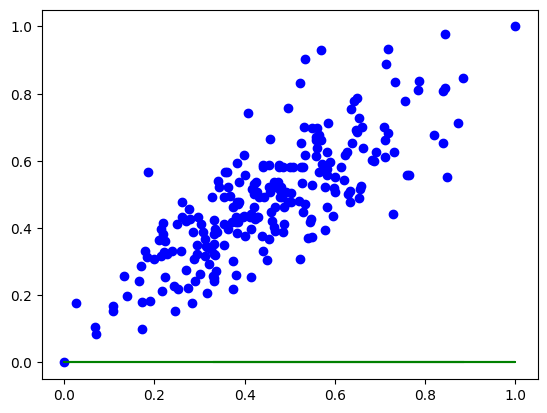

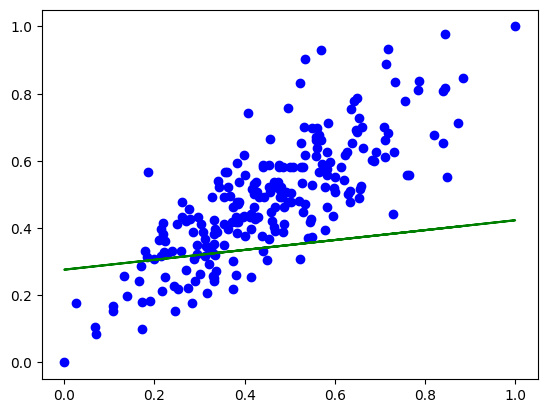

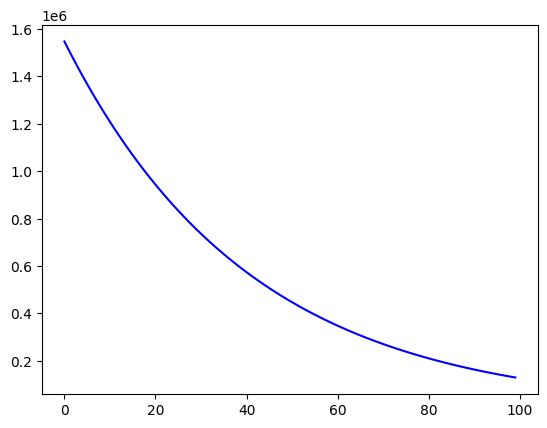